In [1]:
# /usr/bin/python
# -*- encoding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def f(x):
    return 0.5 * np.exp(-(x + 3) ** 2) + np.exp(-x ** 2) + 0.5 * np.exp(-(x - 3) ** 2)

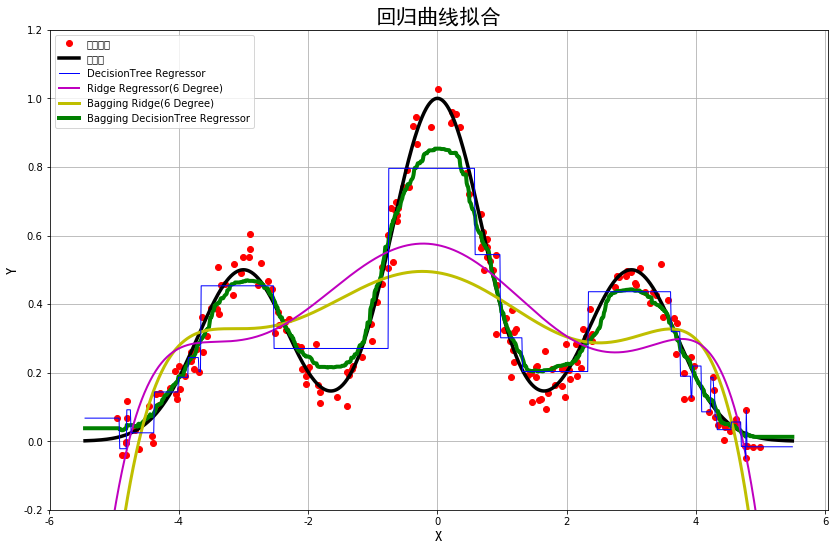

In [3]:
np.random.seed(0)
N = 200
x = np.random.rand(N) * 10 - 5  # [-5,5)
x = np.sort(x)
y = f(x) + 0.05 * np.random.randn(N)
x.shape = -1, 1

degree = 6
ridge = RidgeCV(alphas=np.logspace(-3, 2, 20), fit_intercept=False)
ridged = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('Ridge', ridge)])
bagging_ridged = BaggingRegressor(ridged, n_estimators=100, max_samples=0.2)
dtr = DecisionTreeRegressor(max_depth=5)
regs = [
    ('DecisionTree Regressor', dtr),
    ('Ridge Regressor(%d Degree)' % degree, ridged),
    ('Bagging Ridge(%d Degree)' % degree, bagging_ridged),
    ('Bagging DecisionTree Regressor', BaggingRegressor(dtr, n_estimators=100, max_samples=0.2))]
x_test = np.linspace(1.1 * x.min(), 1.1 * x.max(), 1000)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8), facecolor='w')
plt.plot(x, y, 'ro', label=u'训练数据')
plt.plot(x_test, f(x_test), color='k', lw=3.5, label=u'真实值')
clrs = 'bmyg'
for i, (name, reg) in enumerate(regs):
    reg.fit(x, y)
    y_test = reg.predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_test.ravel(), color=clrs[i], lw=i + 1, label=name, zorder=6 - i)
plt.legend(loc='upper left')
plt.xlabel('X', fontsize=15, fontproperties=fontproperties)
plt.ylabel('Y', fontsize=15, fontproperties=fontproperties)
plt.title(u'回归曲线拟合', fontsize=21, fontproperties=fontproperties)
plt.ylim((-0.2, 1.2))
plt.tight_layout(2)
plt.grid(True)
plt.show()